In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv(r'E:\netData\APS\2010\Paper\aps-RDI-2010.csv.zip')

In [4]:
df[df['if Prize']>0]

,id,year,degree,indegree,outdegree,team size,#institution,closeness,betweenness,authority,...,CD,ni,nj,nk,if Prize,Field,rnk,RDraw,binref,RD
11026,68796,1992,221,187,34,5,2,0.224727,2.385662e+07,7.607151e-06,...,-0.029566,54,133,2485,1,42.0,73.088235,0.207622,>30,3.473213
51556,133151,1989,354,351,3,4,1,0.233635,7.076403e+05,2.345251e-03,...,-0.303059,17,334,695,1,75.0,231.666667,0.029176,1-10,0.430380
136052,223881,2007,99,48,51,2,1,0.230021,2.224264e+06,5.446693e-05,...,-0.013447,2,46,3224,1,73.0,63.215686,0.017983,>30,2.521796
166553,265670,2006,49,34,15,1,0,0.198976,2.119590e+06,3.315722e-05,...,-0.067511,9,25,203,1,25.0,13.533333,0.189341,11-20,8.733860
209314,326459,1993,27,25,2,3,1,0.179085,2.806464e+05,8.330022e-07,...,0.129412,18,7,60,1,52.0,30.000000,0.327273,1-10,3.012007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289715,432997,2000,470,465,5,1,1,0.223721,5.701282e+06,1.357842e-04,...,0.013941,240,225,611,1,78.0,122.200000,0.408719,1-10,6.385401
292673,436060,2001,2,0,2,3,2,0.159818,0.000000e+00,0.000000e+00,...,0.000000,0,0,28,1,84.0,14.000000,0.000000,1-10,0.000000
294863,438349,2002,411,404,7,1,0,0.219584,8.336218e+06,6.910494e-06,...,-0.027108,193,211,260,1,26.0,37.142857,0.437500,1-10,6.591173
298932,442805,2003,23,8,15,4,4,0.177526,1.430819e+05,5.739119e-09,...,-0.005926,2,6,667,1,5.0,44.466667,0.038119,11-20,1.537865


In [3]:
df['Field'] = df['Field'].apply(lambda x:int(x//10))

In [4]:
def ref_classify(x):
    if x <= 10:
        return  '1-10'
    elif x <= 20:
        return  '11-20'
    elif x <= 30:
        return  '21-30'
    else:
        return  '>30'
df['binref'] = df['outdegree'].apply(ref_classify)

In [5]:
def ref_classify2(x):
    if x >= 1980 and x<1990:
        return  '1980-1989'
    elif x >= 1990 and x<2000:
        return  '1990-1999'
    elif x >= 2000 and x<2010:
        return  '2000-2009'
    else:
        return  '<1980'
df['binyear'] = df['year'].apply(ref_classify2)

In [8]:
df.dropna(subset = 'RD' , inplace=True)

# issue 1, 2 References

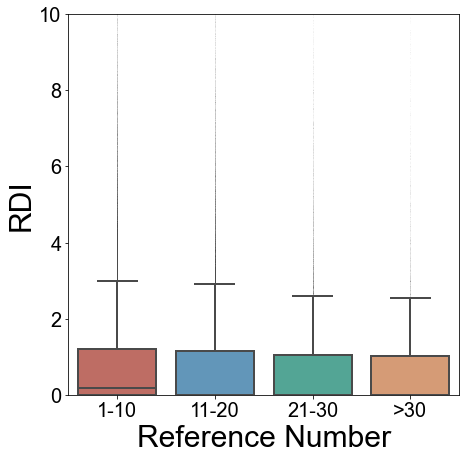

In [5]:
f, ax = plt.subplots(figsize=(7, 7))
sns.boxplot(x="binref", y="RD",order=['1-10','11-20','21-30','>30'],palette = ['#CD6155','#5499C7','#45B39D','#E59866'],
            data=df,meanline=True,linewidth = 2,fliersize=0.005)
sns.set_theme(style="white", palette=None)
plt.axhline(y = 0 , c = '#1A5276', linewidth = 1)
plt.ylim(0,10)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('Reference Number',fontsize = 30)
plt.ylabel('RDI',fontsize = 30)
plt.show()

In [6]:
lst = [df[df['binref']==i]['RD'].values for i in df['binref'].unique()]
scipy.stats.f_oneway(lst[0],lst[1],lst[2],lst[3])

F_onewayResult(statistic=2.5357667459857254e-30, pvalue=1.0)

In [7]:
formula = 'outdegree ~  RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df).fit()
params = model.params.values[1].round(3)
pvalues = model.pvalues.values[1].round(3)
print(params , pvalues)

-0.014 0.052


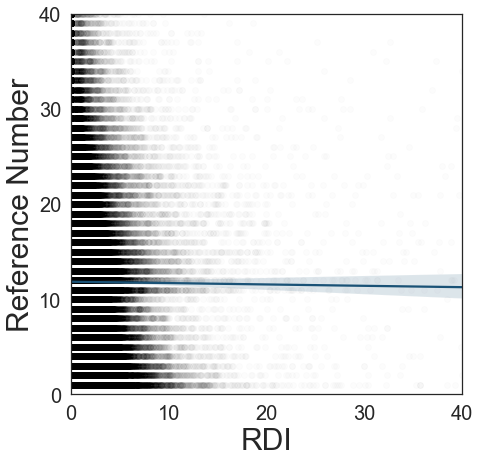

In [10]:
f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['RD'], df['outdegree'], c = 'black' , alpha = 0.01)
sns.regplot(data = df, y='outdegree' , x='RD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#1A5276',scatter = False)
plt.ylim(0,40)
plt.xlim(0,40)
plt.yticks([0,10,20,30,40],fontsize=20,)
plt.xticks([0,10,20,30,40],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('Reference Number',fontsize = 30)
plt.show()

# issue 34 Consistency in year and fields

In [9]:
label = range(10)
dflst = [df[df['Field']==i] for i in label]

In [13]:
scipy.stats.f_oneway(dflst[0]['RD'].values,dflst[1]['RD'].values,dflst[2]['RD'].values,dflst[3]['RD'].values,dflst[4]['RD'].values,dflst[6]['RD'].values,dflst[7]['RD'].values,dflst[8]['RD'].values,dflst[9]['RD'].values,)

F_onewayResult(statistic=5.12543372175431e-30, pvalue=1.0)

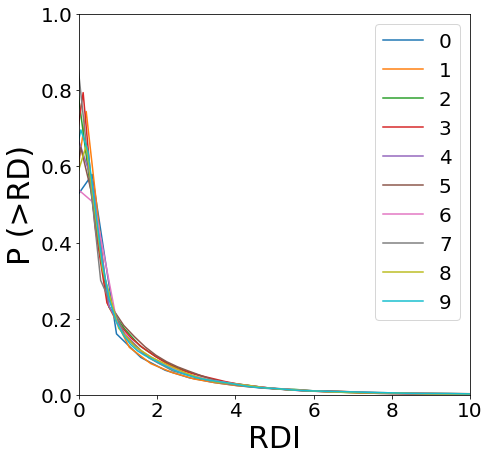

In [47]:
f, ax = plt.subplots(figsize=(7, 7))
for i in label:
    sns.kdeplot(data=dflst[i], x="RD",label = label[i])
plt.ylim(0,1)
plt.xlim(0,10)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('P (>RD)',fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

In [14]:
yearlabel = ['1980-1989','1990-1999','2000-2009']
dflst = [df[df['binyear']==i] for i in yearlabel]

In [15]:
scipy.stats.f_oneway(dflst[0]['RD'].values,dflst[1]['RD'].values,dflst[2]['RD'].values,)

F_onewayResult(statistic=4.173142932764605e-28, pvalue=1.0)

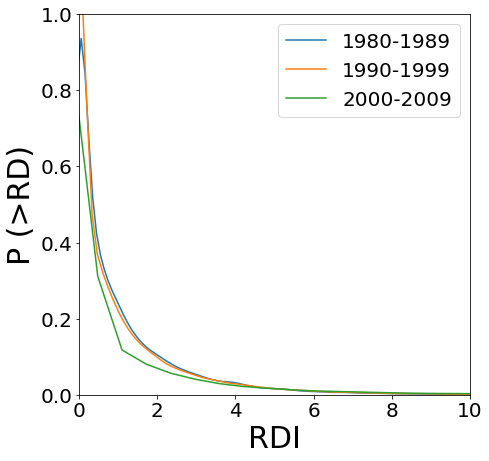

In [67]:
f, ax = plt.subplots(figsize=(7, 7))
for i in range(3):
    sns.kdeplot(data=dflst[i], x="RD",label = yearlabel[i])
plt.ylim(0,1)
plt.xlim(0,10)
plt.yticks(fontsize=20,)
plt.xticks(fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('P (>RD)',fontsize = 30)
plt.legend(fontsize = 20)
plt.show()

# issue 5 Consistency citation count/ PageRank/ h

In [14]:
topv = np.percentile(df['indegree'],99)
formula = 'indegree ~ RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['indegree']<topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               indegree   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                 2.096e+04
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:00:38   Log-Likelihood:            -1.1974e+06
No. Observations:              312795   AIC:                         2.395e+06
Df Residuals:                  312793   BIC:                         2.395e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7703      0.022    313.122      0.0

In [15]:
topv = np.percentile(df['indegree'],99)
formula = 'indegree ~  RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['indegree']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               indegree   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     128.4
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           3.33e-29
Time:                        15:00:39   Log-Likelihood:                -19993.
No. Observations:                3109   AIC:                         3.999e+04
Df Residuals:                    3107   BIC:                         4.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    126.5514      4.252     29.763      0.0

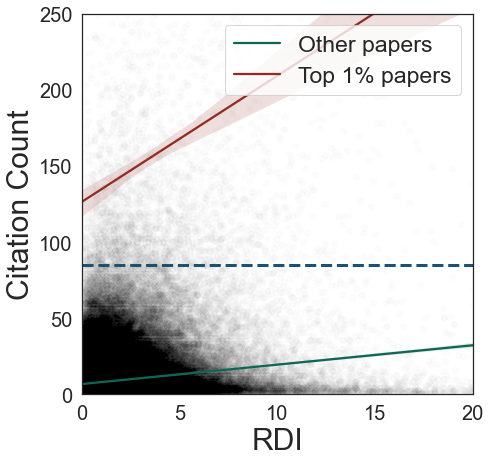

In [37]:
topv = np.percentile(df['indegree'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['RD'], df['indegree'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['indegree']>topv] , y='indegree' , x='RD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False , label = 'Top 1% papers')
sns.regplot(data = df[df['indegree']<topv] , y='indegree' , x='RD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False , label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
# ax.set_yscale("log")
plt.ylim(0,250)
plt.xlim(0,20)
plt.yticks([0,50,100,150,200,250],fontsize=20,)
plt.xticks([0,5,10,15,20],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('Citation Count',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

In [17]:
topv = np.percentile(df['h'],99)
formula = 'h ~ RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['h']<topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                 1.530e+04
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:01:27   Log-Likelihood:            -7.9777e+05
No. Observations:              312601   AIC:                         1.596e+06
Df Residuals:                  312599   BIC:                         1.596e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.5499      0.006    422.442      0.0

In [18]:
topv = np.percentile(df['h'],99)
formula = 'h ~  RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['h']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      h   R-squared:                       0.031
Model:                            OLS   Adj. R-squared:                  0.030
Method:                 Least Squares   F-statistic:                     88.73
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           9.18e-21
Time:                        15:01:27   Log-Likelihood:                -8974.0
No. Observations:                2796   AIC:                         1.795e+04
Df Residuals:                    2794   BIC:                         1.796e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     22.8381      0.175    130.333      0.0

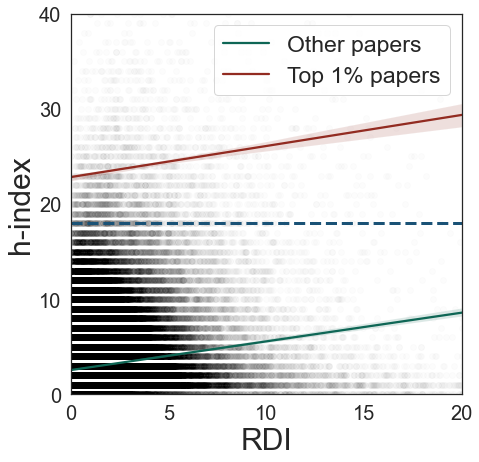

In [36]:
topv = np.percentile(df['h'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['RD'], df['h'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['h']>topv] , y='h' , x='RD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False, label = 'Top 1% papers')
sns.regplot(data = df[df['h']<topv] , y='h' , x='RD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False, label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
plt.ylim(0,40)
plt.xlim(0,20)
plt.yticks([0,10,20,30,40],fontsize=20,)
plt.xticks([0,5,10,15,20],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('h-index',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

In [20]:
topv = np.percentile(df['pagerank'],99)
formula = 'pagerank ~ RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['pagerank']<topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pagerank   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Thu, 27 Jul 2023   Prob (F-statistic):               0.00
Time:                        15:01:40   Log-Likelihood:             3.8925e+06
No. Observations:              312822   AIC:                        -7.785e+06
Df Residuals:                  312820   BIC:                        -7.785e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.327e-07   1.86e-09    448.809      0.0

In [21]:
topv = np.percentile(df['pagerank'],99)
formula = 'pagerank ~  RD'
# fit the OLS model
model = sm.formula.ols(formula=formula, data=df[df['pagerank']>topv]).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               pagerank   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     45.03
Date:                Thu, 27 Jul 2023   Prob (F-statistic):           2.29e-11
Time:                        15:01:40   Log-Likelihood:                 29386.
No. Observations:                3160   AIC:                        -5.877e+04
Df Residuals:                    3158   BIC:                        -5.876e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.77e-05   5.95e-07     29.731      0.0

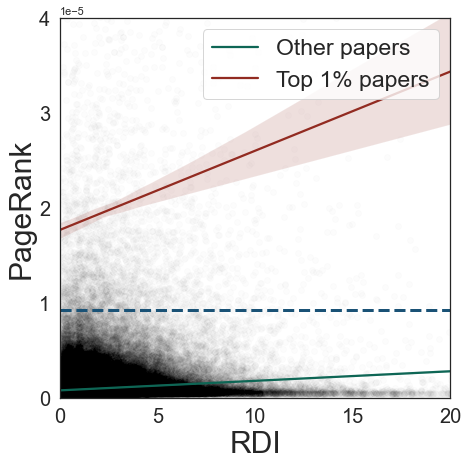

In [35]:
topv = np.percentile(df['pagerank'],99)

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['RD'], df['pagerank'], c = 'black' , alpha = 0.01)
sns.regplot(data = df[df['pagerank']>topv] , y='pagerank' , x='RD', x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#922B21',scatter = False, label = 'Top 1% papers')
sns.regplot(data = df[df['pagerank']<topv] , y='pagerank' , x='RD',x_ci = 90 , n_boot = 100 ,seed = 0 , color = '#0E6655',scatter = False, label='Other papers')
plt.axhline(y = topv , c = '#1A5276', linestyle = '--', linewidth = 3)
plt.ylim(0,0.00004)
plt.xlim(0,20)
plt.yticks([0,0.00001,0.00002,0.00003,0.00004],fontsize=20,)
plt.xticks([0,5,10,15,20],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('PageRank',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

# issue 6 Convergent validity milestones

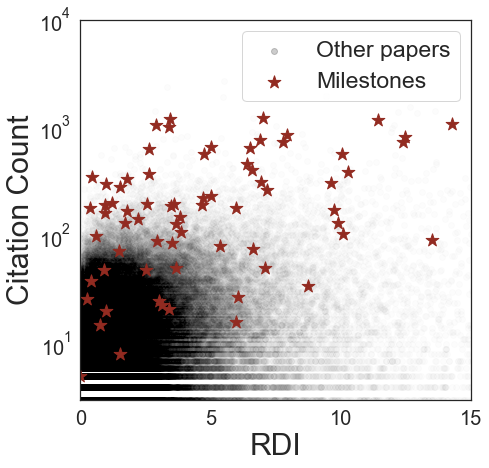

In [39]:
Prizedf = df[df['if Prize']==1]

f, ax = plt.subplots(figsize=(7, 7))
plt.scatter(df['RD'], df['indegree'], c = 'black' , alpha = 0.01)
plt.scatter(df['RD'].values[100], df['indegree'].values[100], c = 'black' , alpha = 0.2,label = 'Other papers')
plt.scatter(Prizedf['RD'], Prizedf['indegree'], c = '#922B21' ,marker = '*',s=180, alpha = 1,label = 'Milestones')
ax.set_yscale("log")
plt.ylim(3,10000)
plt.xlim(0,15)
plt.yticks([10e0,10e1,10e2,10e3],fontsize=20,)
plt.xticks([0,5,10,15],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('Citation Count',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

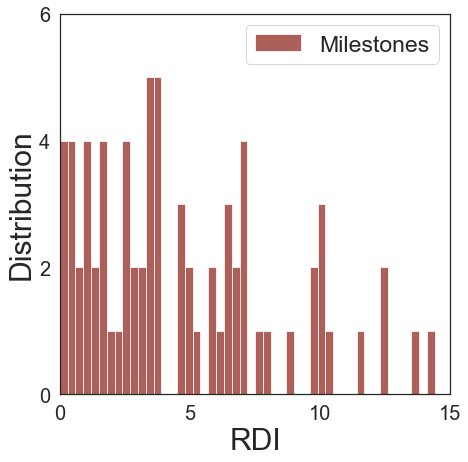

In [43]:
Prizedf = df[df['if Prize']==1]
f, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data = Prizedf, x='RD',binwidth=.3,fill = True,color ='#922B21',label='Milestones' )
plt.ylim(0,6)
plt.xlim(0,15)
plt.yticks([0,2,4,6],fontsize=20,)
plt.xticks([0,5,10,15],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('Distribution',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()

# issue 7 Citation Database

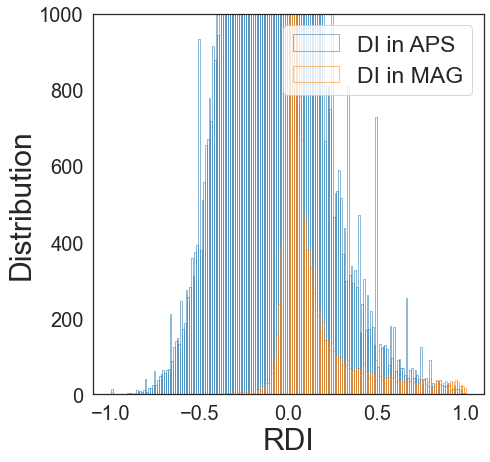

In [12]:
f, ax = plt.subplots(figsize=(7, 7))
sns.histplot(data = df, x='RD',binwidth=.01,fill = False,label='DI in APS')
sns.histplot(data = df, x='Disruption',binwidth=.01,fill = False, label='DI in MAG')
plt.ylim(0,1000)
plt.yticks([0,200,400,600,800,1000],fontsize=20,)
plt.xticks([-1,-0.5,0,0.5,1],fontsize=20,)
plt.xlabel('RDI',fontsize = 30)
plt.ylabel('Distribution',fontsize = 30)
plt.legend(fontsize = 23)
plt.show()